# 搭建卷积神经网络，对手写数字识别图像数据集进行 10 分类。
## 算法流程：
### （1）读取、加载、处理数据集（可选取部分数据集）； （√）
### （2）搭建卷积神经网络； （√）
### （3）训练所搭建的神经网络； （√）
### （4）利用准确率等指标评估所训练的神经网络；（√）
### 加分项 1，保存模型并加载模型，用自己手写的数字图片（手机的便签或微 软画图工具，保证没有阴影）测试分类效果，像素需要降低尽量保持在 28x28x1。 （√）
### 加分项 2，使用 pytorch 或只使用 tensorflow 完成两个案例任意一个（tf√）

（1）读取、加载、处理数据集（可选取部分数据集）；

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 加载数据集
(X_train, y_train), (X_test, y_test) = mnist.load_data()
img_x, img_y = X_train.shape[1], X_train.shape[2]

# 数据预处理
X_train = X_train.reshape(X_train.shape[0], img_x, img_y, 1)
X_test = X_test.reshape(X_test.shape[0], img_x, img_y, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255



Using TensorFlow backend.


2）搭建卷积神经网络； （加分项 2，使用 pytorch 或只使用 tensorflow 完成两个案例任意一个）

In [2]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# 构建模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5),padding='same', activation='relu', input_shape=(img_x, img_y, 1)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64, kernel_size=(5,5), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))




Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
# 看看结构
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3137000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

（3）训练所搭建的神经网络； （√）

In [4]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
 
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
 
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
 
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [5]:
history = LossHistory()

In [6]:
#模型编译
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#训练
model.fit(X_train, y_train, batch_size=128, epochs=10,verbose=1,callbacks=[history])



Epoch 1/10
60000/60000 [==============================] - 214s 4ms/step - loss: 0.1439 - accuracy: 0.9561
Epoch 2/10
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0399 - accuracy: 0.9873
Epoch 3/10
60000/60000 [==============================] - 214s 4ms/step - loss: 0.0266 - accuracy: 0.9916
Epoch 4/10
60000/60000 [==============================] - 229s 4ms/step - loss: 0.0186 - accuracy: 0.9937
Epoch 5/10
60000/60000 [==============================] - 218s 4ms/step - loss: 0.0136 - accuracy: 0.9956
Epoch 6/10
60000/60000 [==============================] - 230s 4ms/step - loss: 0.0100 - accuracy: 0.9970
Epoch 7/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0094 - accuracy: 0.9970
Epoch 8/10
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0083 - accuracy: 0.9972
Epoch 9/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0066 - accuracy: 0.9977
Epoch 10/10
60000/60000 [=====================

（4）利用准确率等指标评估所训练的神经网络；

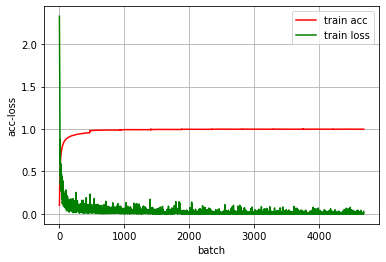

In [7]:
history.loss_plot('batch')

In [8]:
#评估模型
score = model.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 8s 775us/step
[0.03489872604960263, 0.9911999702453613]


In [9]:
y_pred=model.predict_classes(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
# 加载相关库函数
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(y, y_pred, cmap=plt.cm.Blues, title='混淆矩阵'):
    """
    绘制混淆矩阵
    :param y: 真实值
    :param y_pred: 预测值
    :param cmap: 热力图的颜色
    :param title: 图像标题
    :return:
    """
    cm = confusion_matrix(y, y_pred)
    classes = list(set(y))
    classes.sort()
    plt.imshow(cm, cmap)
    indices = range(len(cm))
    plt.xticks(indices, classes)
    plt.yticks(indices, classes)
    # 热度表
    plt.colorbar()
    # 坐标轴含义
    plt.xlabel('guess')
    plt.ylabel('fact')
    plt.title(title)
    # 显示数据的值（Numbers）
    for first_index in range(len(cm)):
        for second_index in range(len(cm[first_index])):
            plt.text(first_index, second_index, cm[first_index][second_index])

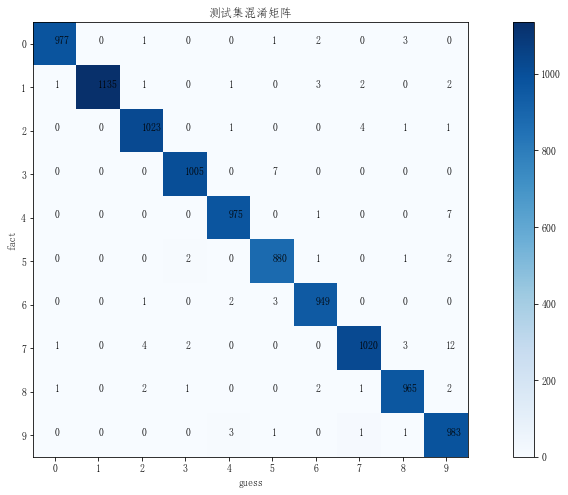

In [11]:
# 输出混淆矩阵
plt.figure(figsize=(16,8), facecolor='w')

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plot_confusion_matrix(np.argmax(y_test, axis=1),y_pred,
                      title='测试集混淆矩阵')
plt.show()

加分项 1，保存模型并加载模型，用自己手写的数字图片（手机的便签或微 软画图工具，保证没有阴影）测试分类效果，像素需要降低尽量保持在 28x28x1。

（1）保存模型并加载模型

In [12]:
# 保存模型
model.save('mnist_cnn.h5')

In [13]:
import matplotlib.pyplot as plt

from keras.models import load_model


In [14]:

model.load_weights('mnist_cnn.h5')

In [15]:
# 加载模型
import h5py
file=h5py.File('mnist_cnn.h5')


C:\Users\29459\anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


In [16]:
# 加载模型
model=keras.models.load_model(file)

In [17]:
#评估模型
score = model.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 7s 652us/step
[0.03489872604960263, 0.9911999702453613]


(2)测试分类效果

Help on function load_img in module keras_preprocessing.image.utils:

load_img(path, grayscale=False, color_mode='rgb', target_size=None, interpolation='nearest')
    Loads an image into PIL format.
    
    # Arguments
        path: Path to image file.
        grayscale: DEPRECATED use `color_mode="grayscale"`.
        color_mode: The desired image format. One of "grayscale", "rgb", "rgba".
            "grayscale" supports 8-bit images and 32-bit signed integer images.
            Default: "rgb".
        target_size: Either `None` (default to original size)
            or tuple of ints `(img_height, img_width)`.
        interpolation: Interpolation method used to resample the image if the
            target size is different from that of the loaded image.
            Supported methods are "nearest", "bilinear", and "bicubic".
            If PIL version 1.1.3 or newer is installed, "lanczos" is also
            supported. If PIL version 3.4.0 or newer is installed, "box" and
          

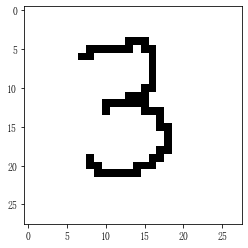

预测数字： 3


In [18]:
from keras.preprocessing.image import load_img,img_to_array
path = './data/1.png'
# 图片处理
help(load_img)
img = load_img(path, target_size=(28, 28),color_mode="grayscale")
# 改成黑底
img = 255-img_to_array(img)
# 查看自己加载的图片
plt.imshow(img , cmap=plt.cm.binary)
plt.show()
# 进行数据预测
img = img.astype('float32')/255
img = img.reshape((1, 28, 28, 1))
y_pred = model.predict(img)
print('预测数字：',np.argmax(y_pred, axis=1)[0])

（3）测试pytorch

In [22]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [36]:
from torch import nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Sequential( 
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5,
                      stride=1, padding=2),  
            
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)  
        )

        self.conv2 = nn.Sequential(  
            nn.Conv2d(32, 64, 5, 1, 2),  
            nn.ReLU(),
            nn.MaxPool2d(2)  
        )
        self.fc = nn.Sequential(
                                nn.Flatten(),
                                nn.Linear(49*64,1000) ,
                                nn.ReLU(inplace=True) ,
                                nn.Linear(1000,10) ,
                                nn.Softmax(dim = 1) )
    def forward( self , x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.reshape(x.size(0) , -1)
        fc_out = self.fc(x)
        return fc_out

In [37]:
model=SimpleCNN()
print(model)

SimpleCNN(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=1000, bias=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=1000, out_features=10, bias=True)
    (4): Softmax(dim=1)
  )
)


In [39]:
import torch
from torch import nn , optim
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
from torch.utils.data import DataLoader


# 定义超参数
learning_rate = 1e-2      # 学习率
batch_size    = 128       # 批的大小
epoches_num   = 100        # 遍历训练集的次数


# 下载训练集 MNIST 手写数字训练集
train_dataset = datasets.MNIST( root='./data/', train=True, transform=transforms.ToTensor(), download=True )
train_loader  = DataLoader( train_dataset, batch_size=batch_size, shuffle=True )


# 定义model 、loss 、optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD( model.parameters(), lr=learning_rate )


if torch.cuda.is_available():
    print("CUDA is enable!")
    model = model.cuda()
    model.train()


# 开始训练
for epoch in range(epoches_num):
    print('*' * 40)
    running_loss = 0.0
    running_acc  = 0.0

    # 训练
    for i, data in enumerate(train_loader, 1 ):
        img, label = data
		
		#使用GPU训练
        if torch.cuda.is_available():
            img = Variable(img).cuda()
            label = Variable(label).cuda()
        else:
            img = Variable(img)
            label = Variable(label)

        # 前向传播
        out = model(img)
        loss = criterion(out, label)
        running_loss += loss.item() * label.size(0)
        _ , pred = torch.max(out, 1)
        num_correct = (pred == label).sum()
        accuracy = (pred == label).float().mean()
        running_acc += num_correct.item()

        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Finish  {}  Loss: {:.6f}, Acc: {:.6f}'.format( epoch+1 , running_loss / (len(train_dataset)), running_acc / (len(train_dataset))))




CUDA is enable!
****************************************
Finish  1  Loss: 2.300718, Acc: 0.255667
****************************************
Finish  2  Loss: 2.295031, Acc: 0.203667
****************************************
Finish  3  Loss: 2.268874, Acc: 0.131700
****************************************
Finish  4  Loss: 2.060441, Acc: 0.507550
****************************************
Finish  5  Loss: 1.798793, Acc: 0.705333
****************************************
Finish  6  Loss: 1.689914, Acc: 0.803950
****************************************
Finish  7  Loss: 1.659059, Acc: 0.820250
****************************************
Finish  8  Loss: 1.645294, Acc: 0.827950
****************************************
Finish  9  Loss: 1.636786, Acc: 0.833817
****************************************
Finish  10  Loss: 1.630584, Acc: 0.838617
****************************************
Finish  11  Loss: 1.626034, Acc: 0.842233
****************************************
Finish  12  Loss: 1.622427, Acc: 0.8446

Finish  100  Loss: 1.474457, Acc: 0.988750


In [40]:
# 保存模型
torch.save(model, 'cnn.pt')

In [41]:
# 加载 Train 模型
model = torch.load('cnn.pt')
criterion = nn.CrossEntropyLoss()
model.eval()
eval_acc  = 0
eval_loss = 0
test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)
# 测试
for data in test_loader:
    img, label = data
    if torch.cuda.is_available():
        img   = Variable(img  ).cuda()
        label = Variable(label).cuda()
    else:
        img   = Variable(img  )
        label = Variable(label)

    out  = model(img)
    loss = criterion(out, label)
    eval_loss += loss.item() * label.size(0)

    _ , pred = torch.max(out,1)
    num_correct = (pred==label).sum()
    eval_acc += num_correct.item()
    print('Test Loss: {:.6f}   ,   Acc: {:.6f}'.format( eval_loss/(len(test_dataset)), eval_acc/(len(test_dataset)) ))
    

ERROR! Session/line number was not unique in database. History logging moved to new session 371
Test Loss: 0.018713   ,   Acc: 0.012800
Test Loss: 0.037535   ,   Acc: 0.025500
Test Loss: 0.056457   ,   Acc: 0.038100
Test Loss: 0.075357   ,   Acc: 0.050700
Test Loss: 0.094336   ,   Acc: 0.063200
Test Loss: 0.113311   ,   Acc: 0.075800
Test Loss: 0.132073   ,   Acc: 0.088600
Test Loss: 0.151112   ,   Acc: 0.101100
Test Loss: 0.169948   ,   Acc: 0.113800
Test Loss: 0.189210   ,   Acc: 0.126000
Test Loss: 0.208302   ,   Acc: 0.138400
Test Loss: 0.227314   ,   Acc: 0.150900
Test Loss: 0.246164   ,   Acc: 0.163600
Test Loss: 0.265302   ,   Acc: 0.175900
Test Loss: 0.284277   ,   Acc: 0.188500
Test Loss: 0.303241   ,   Acc: 0.201000
Test Loss: 0.322328   ,   Acc: 0.213400
Test Loss: 0.341385   ,   Acc: 0.225900
Test Loss: 0.360448   ,   Acc: 0.238300
Test Loss: 0.379469   ,   Acc: 0.250800
Test Loss: 0.398454   ,   Acc: 0.263300
Test Loss: 0.417259   ,   Acc: 0.276000
Test Loss: 0.436289   , 